# **Linear Regression 2-dimensional**
A set of $N$ data points $(x_i, y_i)$, the goal is to find the find the best linear map $f: \mathbb{R}^2 \to \mathbb{R}^2$ such that $f(x) = mx + b$ fits the data points. In simpler terms, we assume the relation between the dependenet variable $y$ and independent variable $x$ is linear and try finding the optimal $m$ and $b$ such that some error function is minimised.

## **Loss/Error Function**
\begin{equation}
E = \frac{1}{N}\sum_{i = 1}^{N}(y_i - \widehat{y})^2
\end{equation}
where,
$\widehat{y} = mx_i + b$, hence
\begin{equation}
E = \frac{1}{N}\sum_{i = 1}^{N}(y_i - (mx_i + b))^2
\end{equation}

## **Optimal $m$ and $b$**
\begin{equation}
\frac{∂E}{∂m} = -\frac{2}{N}\sum_{i = 1}^{N}(x_i \times (y_i - (mx_i + b)) )
\end{equation}

\begin{equation}
\frac{∂E}{∂b} = -\frac{2}{N}\sum_{i = 1}^{N}(y_i - (mx_i + b))
\end{equation}

## **Gradient Descent**
Arrive at the desired $m$ and $b$ by updating these values following the direction of greatest descent of this function. The learning rate $L$ has to be specified.
\begin{equation}
\bar{m} = m - L\frac{∂E}{∂m}
\end{equation}

\begin{equation}
\bar{b} = b - L\frac{∂E}{∂b}
\end{equation}

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

Enable the support

In [92]:
from google.colab import output
output.enable_custom_widget_manager()

To disable the support

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [93]:
def loss_func(m, b, data):
  N = len(data)
  E = 0
  for i in range(N):
    E += (data[i][1] - (m * data[i][0] + b))**2
  return E/N

In [94]:
def gradient_descent(data, m_now, b_now, L):
  N = len(data)
  E_m, E_b = 0, 0
  for i in range(N):
    E_m += -2/N * (data[i][0] * (data[i][1] - m_now * data[i][0] - b_now))
    E_b += -2/N * (data[i][1] - m_now * data[i][0] - b_now)

  m_cur = m_now - L * E_m
  b_cur = b_now - L * E_b

  return m_cur, b_cur

m = 2.4306905668231544, b = 0.045763347379328585


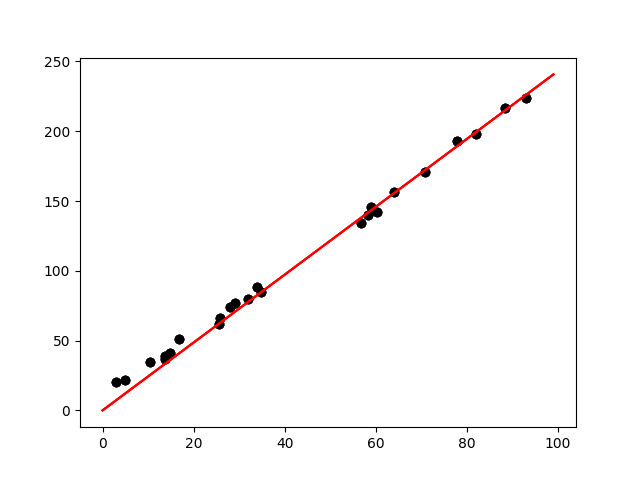

In [95]:
df = pd.read_csv("Data.csv")
data = df.to_numpy()
m, b, L, epochs = 0, 0, 0.00001, 100
for i in range(epochs):
  m, b = gradient_descent(data, m, b, L)

print(f"m = {m}, b = {b}")
plt.scatter(data[:, 0], data[:, 1], color = "black")
X = range(100)
plt.plot(X, m*X + b, color = "red")
plt.show()

In [96]:
m_x = np.linspace(-1, 8, 100)
b_y = np.linspace(-20, 20, 100)
m_mesh, b_mesh = np.meshgrid(m_x, b_y)

E = loss_func(m_mesh, b_mesh, data)

# The Loss Function
fig = go.Figure(data = [go.Surface(x = m_mesh, y = b_mesh, z = E)])

# The Minima point
fig.add_trace(go.Scatter3d(x = [m], y = [b], z = [loss_func(m, b, data)], mode = "markers", marker = dict(size = 10, color = "red"), name = "Minima"))

fig.update_layout(scene = dict(xaxis_title = "Slope (m)", yaxis_title = "Intercept (b)", zaxis_title = "Loss Function E(m ,b)",))
fig.show()

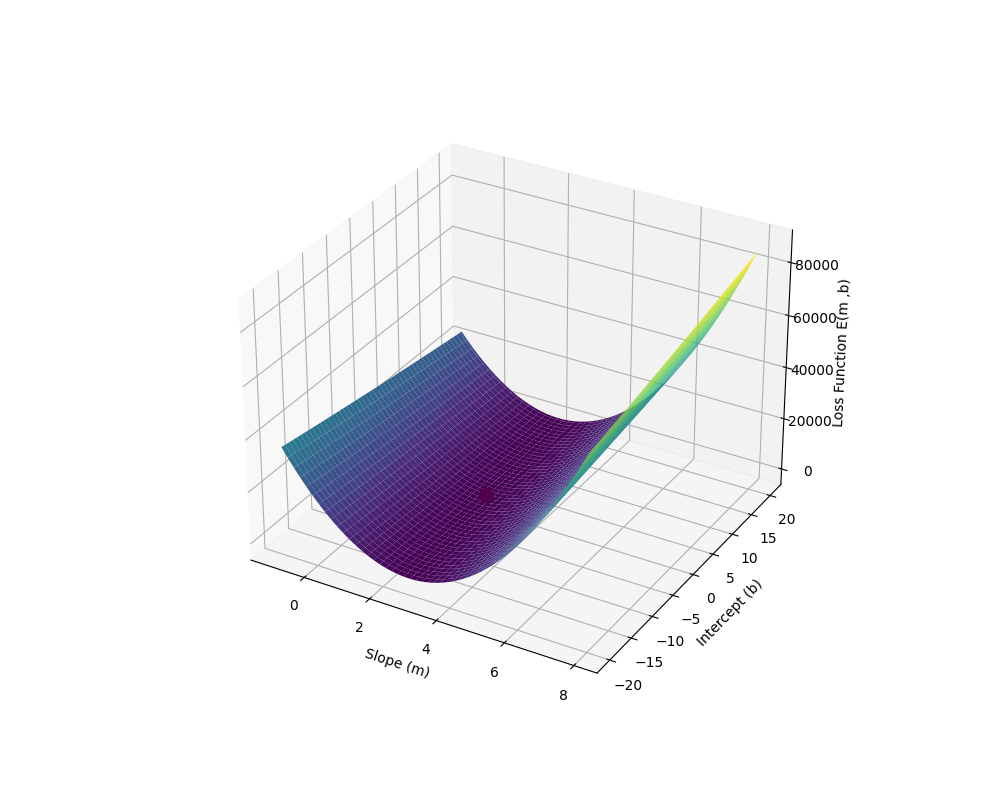

In [98]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(m_mesh, b_mesh, E, cmap = "viridis")
ax.scatter(m, b, loss_func(m, b, data), c = "red", s = 100, label = "Minima")

ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Loss Function E(m ,b)")
plt.show()